In [1]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from itertools import chain
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from matplotlib.lines import Line2D
def autopct(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

typeLegend = [Line2D([0], [0], color="C0", lw=8), Line2D([0], [0], color="C1", lw=8)]
wasteLegend = [Line2D([0], [0], color="C0", lw=4),
               Line2D([0], [0], color="C1", lw=4),
               Line2D([0], [0], color="C2", lw=4),
               Line2D([0], [0], color="C3", lw=4),
               Line2D([0], [0], color="C4", lw=4)]

In [3]:
df = pd.read_csv("wastes.csv")
df

,What is your name ?,What is the main programming language you use in the chosen project?,What is your main role in the chosen project?,What is your level of work experience in a such or similar role?,How long (in months) is your work experience in such or similar roles in general?,How long (in months) is your work experience in the chosen project?,"How common are those task-related ""wastes"" in the chosen project? [Unclearly defined tasks]","How common are those task-related ""wastes"" in the chosen project? [Focusing on unneeded tasks]","How common are those task-related ""wastes"" in the chosen project? [Leaving tasks uncompleted]","How common are those task-related ""wastes"" in the chosen project? [Poorly executed tasks]",...,"How common are those information-related ""wastes"" in the chosen project? [Too frequent meetings]","How common are those information-related ""wastes"" in the chosen project? [Too long meetings]","How common are those information-related ""wastes"" in the chosen project? [Bad flow of information inside team]","How common are those information-related ""wastes"" in the chosen project? [Language-specific communication issues]","How harmful are those information-related ""wastes"" in the chosen project? [Issues with documentation]","How harmful are those information-related ""wastes"" in the chosen project? [Wrong introduction of new team members]","How harmful are those information-related ""wastes"" in the chosen project? [Too frequent meetings]","How harmful are those information-related ""wastes"" in the chosen project? [Too long meetings]","How harmful are those information-related ""wastes"" in the chosen project? [Bad flow of information inside team]","How harmful are those information-related ""wastes"" in the chosen project? [Language-specific communication issues]"
0,Bartek,Python,Fullstack Developer,2,7,7,3,2,2,4,...,2,5,3,2,2,4,5,5,5,2
1,Piotr H,Java,Fullstack Developer,2,19,17,3,1,2,2,...,1,3,1,1,3,1,1,2,1,1
2,Jean,PHP,Fullstack Developer,3,18,18,4,3,4,3,...,1,3,2,1,4,3,4,3,3,1
3,Adrian,Java,Backend Developer,5,60,10,3,1,5,4,...,1,1,2,1,5,4,3,3,5,5
4,Jaime,Java,Backend Developer,3,2,1,4,3,3,4,...,4,2,2,3,3,4,2,2,4,3
5,Paweł Kuffel,JavaScript,Backend Developer,3,24,8,3,3,4,2,...,2,3,2,1,4,3,2,4,4,2
6,Kacper Maciejewski,AL,Fullstack Developer,2,16,2,2,1,3,2,...,1,1,2,1,5,3,2,1,4,3
7,Philippe,JavaScript,Fullstack Developer,2,7,2,5,3,3,2,...,1,1,2,1,2,1,1,1,2,2
8,Anastazja,Python,Software Tester,1,4,3,2,1,2,3,...,3,3,2,1,5,4,4,4,5,3
9,Ivona,JavaScript,Frontend Developer,1,9,9,2,2,1,3,...,2,2,2,2,2,5,3,3,5,3


In [4]:
taskRelated = {col[col.index('[')+1:-1] for col in df.columns[6:11]}
infoRelated = {col[col.index('[')+1:-1] for col in df.columns[16:22]}

In [5]:
# Q1: What is your name ?
df.drop(columns=["What is your name ?"], inplace=True)

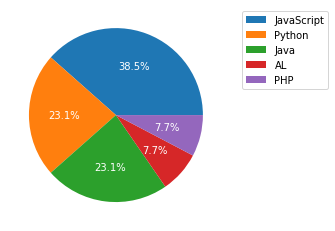

In [6]:
# Q2: What is the main programming language you use in the chosen project?
langData = df["What is the main programming language you use in the chosen project?"].value_counts()
_, ax = plt.subplots()
languages, _, _ = ax.pie(langData.values, autopct=lambda pct: autopct(pct, langData.values), textprops={"color": "w"})
ax.legend(languages, langData.index, bbox_to_anchor=(1, 0, 0.5, 1))
#ax.set_title("Main languages used in project")
plt.show()

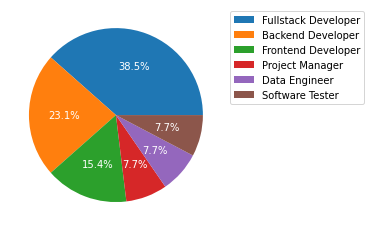

In [7]:
# Q3: What is your main role in the chosen project?
rolesData = df["What is your main role in the chosen project?"].value_counts()
_, ax = plt.subplots()
roles, _, _ = ax.pie(rolesData.values, autopct=lambda pct: autopct(pct, rolesData.values), textprops={"color": "w"})
ax.legend(roles, rolesData.index, bbox_to_anchor=(1, 0, 0.5, 1))
#ax.set_title("Main roles in project")
plt.show()

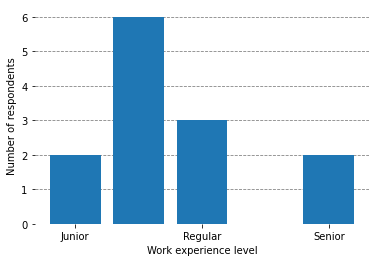

In [8]:
# Q4: What is your level of work experience in a such or similar role?
levelData = df["What is your level of work experience in a such or similar role?"].value_counts()
fig, ax = plt.subplots()
plt.bar(range(1, 6), [levelData.get(i, 0) for i in range(1, 6)])
plt.xticks([1, 3, 5], ["Junior", "Regular", "Senior"])
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.ylabel('Number of respondents')
plt.xlabel('Work experience level')
ax.set_axisbelow(True)
plt.box(False)
plt.show()

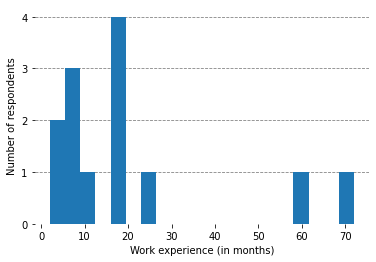

In [9]:
# Q5: How long (in months) is your work experience in a such or similar role in general?
fig, ax = plt.subplots()
plt.hist(df["How long (in months) is your work experience in such or similar roles in general?"], bins=20)
plt.xlabel('Work experience (in months)')
plt.ylabel('Number of respondents')
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
plt.yticks(range(5))
plt.box(False)
plt.show()

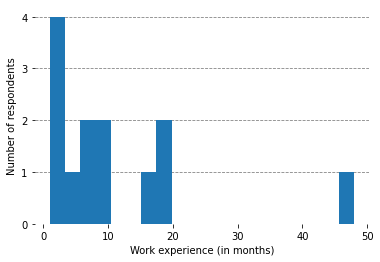

In [10]:
# Q6: How long (in months) is your work experience in the chosen project?
fig, ax = plt.subplots()
plt.hist(df["How long (in months) is your work experience in the chosen project?"], bins=20)
plt.xlabel('Work experience (in months)')
plt.ylabel('Number of respondents')
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_axisbelow(True)
plt.yticks(range(5))
plt.box(False)
plt.show()

In [11]:
# RQ1: What kinds of "waste" in software development are the most common?
frequenciesDict = {}
for col in chain(df.columns[5:10], df.columns[15:21]):
    name = col[col.index('[')+1:-1]
    frequenciesDict[name] = df[col].mean()
frequenciesList = sorted(frequenciesDict.items(), key=lambda x: x[1])
names, means = zip(*frequenciesList)
colors = ["C0" if name in taskRelated else "C1" for name in names]

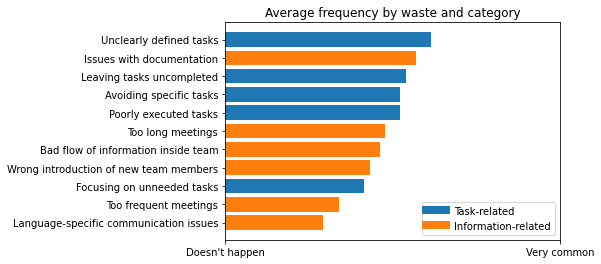

In [12]:
_, ax = plt.subplots()
ax.barh(names, means, color=colors)

ax.legend(typeLegend, ["Task-related", "Information-related"])
ax.set_title('Average frequency by waste and category')
plt.xticks([0,5], ["Doesn't happen", "Very common"])

plt.show()

In [13]:
dfStacked = pd.DataFrame(columns=range(1,6))
for col in chain(df.columns[5:10], df.columns[15:21]):
    counter = Counter({i: 0 for i in range(1, 6)})
    counter.update(df[col])
    _, values = zip(*sorted(counter.items()))
    
    wasteName = col[col.index('[')+1:-1]
    dfStacked.loc[wasteName] = values

dfStacked["sum"] = dfStacked[1]+dfStacked[2]*2+dfStacked[3]*3+dfStacked[4]*4+dfStacked[5]*5
dfStacked.sort_values(by="sum", inplace=True)
dfStacked.drop(columns=["sum"], inplace=True)

print(dfStacked)

                                        1  2  3  4  5
Language-specific communication issues  8  4  1  0  0
Too frequent meetings                   7  4  1  1  0
Focusing on unneeded tasks              5  3  4  1  0
Wrong introduction of new team members  5  4  2  1  1
Bad flow of information inside team     1  8  3  1  0
Too long meetings                       4  3  4  1  1
Poorly executed tasks                   2  4  4  3  0
Avoiding specific tasks                 3  4  1  5  0
Leaving tasks uncompleted               2  4  4  2  1
Issues with documentation               2  5  2  1  3
Unclearly defined tasks                 0  4  5  3  1


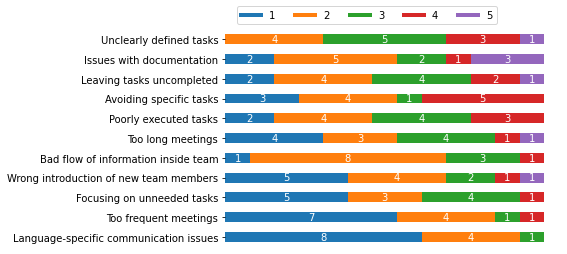

In [14]:
fig, ax = plt.subplots()
dfStacked.plot(kind='barh', stacked=True, ax=ax, legend=False)
plt.xticks([])
plt.box(False)
plt.legend(wasteLegend, range(1, 6), bbox_to_anchor=(.02, 1), ncol=len(df.columns))

for n in dfStacked:
    for i, (cumsum, x) in enumerate(zip(dfStacked.cumsum(1)[n], dfStacked[n])):
        if x>0:
            plt.text(cumsum-x/2, i, str(x), va='center', ha='center', color='white')

In [15]:
harmfulnessDict = {}
for col in chain(df.columns[10:15], df.columns[21:27]):
    name = col[col.index('[')+1:-1]
    harmfulnessDict[name] = df[col].mean()
harmfulnessList = sorted(harmfulnessDict.items(), key=lambda x: x[1])
names, means = zip(*harmfulnessList)
colors = ["C0" if name in taskRelated else "C1" for name in names]

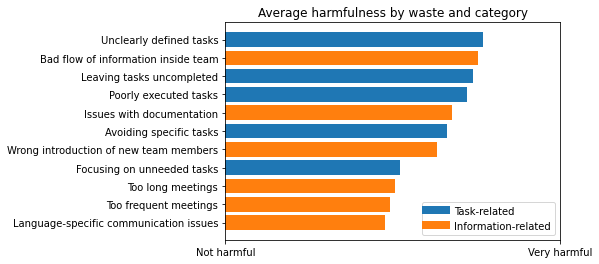

In [16]:
_, ax = plt.subplots()
ax.barh(names, means, color=colors)

ax.legend(typeLegend, ["Task-related", "Information-related"])
ax.set_title('Average harmfulness by waste and category')
plt.xticks([0,5], ["Not harmful", "Very harmful"])
plt.show()

In [17]:
dfStacked = pd.DataFrame(columns=range(1,6))
for col in chain(df.columns[10:15], df.columns[21:27]):
    counter = Counter({i: 0 for i in range(1, 6)})
    counter.update(df[col])
    _, values = zip(*sorted(counter.items()))
    
    wasteName = col[col.index('[')+1:-1]
    dfStacked.loc[wasteName] = values

dfStacked["sum"] = dfStacked[1]+dfStacked[2]*2+dfStacked[3]*3+dfStacked[4]*4+dfStacked[5]*5
dfStacked.sort_values(by="sum", inplace=True)
dfStacked.drop(columns=["sum"], inplace=True)

print(dfStacked)

                                        1  2  3  4  5
Language-specific communication issues  3  4  5  0  1
Too frequent meetings                   3  5  2  2  1
Too long meetings                       3  4  3  2  1
Focusing on unneeded tasks              2  5  3  2  1
Wrong introduction of new team members  2  2  3  4  2
Avoiding specific tasks                 1  1  7  1  3
Issues with documentation               1  3  3  2  4
Poorly executed tasks                   0  1  4  7  1
Leaving tasks uncompleted               0  1  4  6  2
Bad flow of information inside team     1  2  1  4  5
Unclearly defined tasks                 0  3  2  2  6


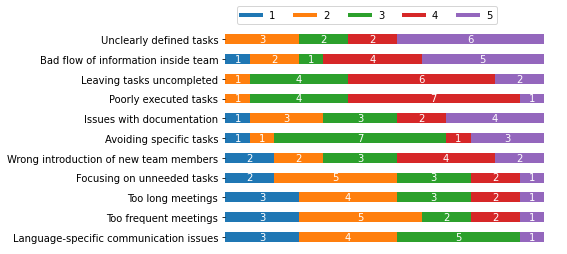

In [18]:
fig, ax = plt.subplots()
dfStacked.plot(kind='barh', stacked=True, ax=ax, legend=False)
plt.xticks([])
plt.box(False)
plt.legend(wasteLegend, range(1, 6), bbox_to_anchor=(.02, 1), ncol=len(df.columns))

for n in dfStacked:
    for i, (cumsum, x) in enumerate(zip(dfStacked.cumsum(1)[n], dfStacked[n])):
        if x>0:
            plt.text(cumsum-x/2, i, str(x), va='center', ha='center', color='white')

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator


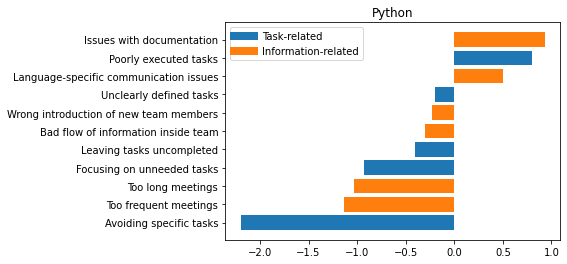

In [19]:
lang = "Python"
df1 = df[df["What is the main programming language you use in the chosen project?"]!=lang]
df2 = df[df["What is the main programming language you use in the chosen project?"]==lang]

#role = "Fullstack Developer"
#df1 = df[df["What is your main role in the chosen project?"]!=role]
#df2 = df[df["What is your main role in the chosen project?"]==role]

#print(df["What is your level of work experience in a such or similar role?"].median())
#df1 = df[df["What is your level of work experience in a such or similar role?"]<3]
#df2 = df[df["What is your level of work experience in a such or similar role?"]>=3]

#print(df["How long (in months) is your work experience in such or similar roles in general?"].median())
#df1 = df[df["How long (in months) is your work experience in such or similar roles in general?"]<16]
#df2 = df[df["How long (in months) is your work experience in such or similar roles in general?"]>=16]

#print(df["How long (in months) is your work experience in the chosen project?"].median())
#df1 = df[df["How long (in months) is your work experience in the chosen project?"]<8]
#df2 = df[df["How long (in months) is your work experience in the chosen project?"]>=8]

'''
wFrequencies = []
for col in chain(df.columns[6:11], df.columns[16:22]):
    wasteName = col[col.index('[')+1:-1]
    wFrequencies += [(wasteName, df1[col].mean(), df2[col].mean())]
wFrequencies = sorted(wFrequencies, key=lambda x: x[1])
fNames, frequencyMeans1, frequencyMeans2 = zip(*wFrequencies)
diffs = [x-y for x, y in zip(frequencyMeans1, frequencyMeans2)]

y = np.arange(len(fNames))  # the label locations
width = 0.4  # the width of the bars

_, ax = plt.subplots()
ax.barh(y + width/2, frequencyMeans1, width, label="df1")
ax.barh(y - width/2, frequencyMeans2, width, label="df2")
#ax.barh(y - width, diffs, width, label="df3")
plt.xticks([0,5], ["Doesn't happen", "Very common"])
ax.set_title('Frequency by waste and category')
ax.set_yticklabels(fNames)
ax.set_yticks(y)
ax.legend()
plt.show()
'''

dfDiff = pd.DataFrame(columns=["df1Mean", "df2Mean", "diff", "type"])
for col in chain(df.columns[10:15], df.columns[21:27]):
    wasteName = col[col.index('[')+1:-1]
    df1Mean, df2Mean = df1[col].mean(), df2[col].mean()
    dfDiff.loc[wasteName] = [df1Mean, df2Mean, df1Mean-df2Mean, "C0" if wasteName in taskRelated else "C1"]
dfDiff.sort_values(by="diff", inplace=True)

y = np.arange(len(dfDiff))
_, ax = plt.subplots()
ax.barh(y, dfDiff["diff"], color=dfDiff["type"])
ax.set_title(lang)
ax.set_yticklabels(dfDiff.index)
ax.set_yticks(y)
#ax.set_xticks(np.arange(-2, 2, .5))
ax.legend(typeLegend, ["Task-related", "Information-related"])#, loc="lower right")
plt.show()

In [20]:
freqToHarmCorr = {}
for i in range(5, 10):
    name = df.iloc[:,i].name
    name = name[name.index('[')+1:-1]
    freqToHarmCorr[name] = df.iloc[:,i].corr(df.iloc[:,i+5])
for i in range(15, 21):
    name = df.iloc[:,i].name
    name = name[name.index('[')+1:-1]
    freqToHarmCorr[name] = df.iloc[:,i].corr(df.iloc[:,i+6])
freqToHarmCorr = sorted(freqToHarmCorr.items(), key=lambda x: x[1])
names, corrs = zip(*freqToHarmCorr)
colors = ["C0" if name in taskRelated else "C1" for name in names]

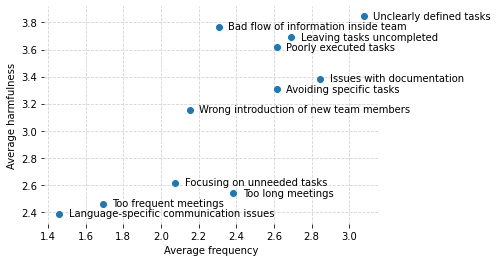

In [21]:
wastes = frequenciesDict.keys()
X, Y = zip(*[(frequenciesDict[waste], harmfulnessDict[waste]) for waste in wastes])

fig, ax = plt.subplots()
ax.scatter(X, Y)
for i, txt in enumerate(wastes):
    plt.annotate(txt, (X[i]+.05, Y[i]-.02))
ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.xaxis.grid(color='lightgray', linestyle='dashed')
plt.ylabel('Average harmfulness')
plt.xlabel('Average frequency')
ax.set_axisbelow(True)
plt.box(False)
plt.show()

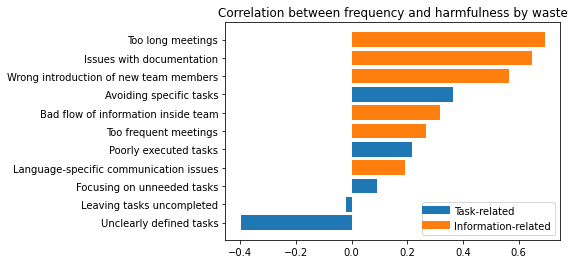

In [22]:
_, ax = plt.subplots()
ax.barh(names, corrs, color=colors)

ax.legend(typeLegend, ["Task-related", "Information-related"], loc="lower right")
ax.set_title('Correlation between frequency and harmfulness by waste')

plt.show()

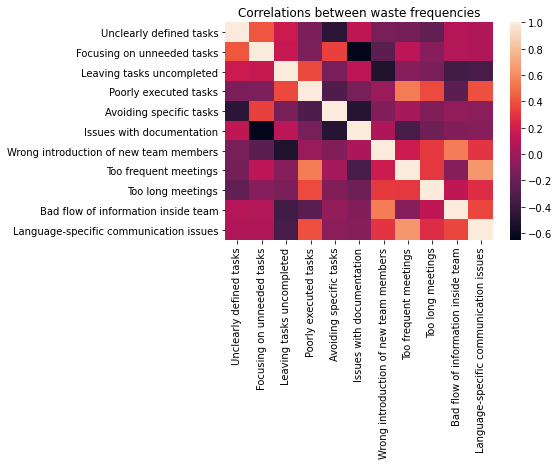

In [23]:
corr = df.iloc[:,list(chain(range(5, 10), range(15, 21)))].corr()
columns = [col[col.index('[')+1:-1] for col in corr.columns]
sns.heatmap(corr, xticklabels=columns, yticklabels=columns).set_title("Correlations between waste frequencies")
plt.show()

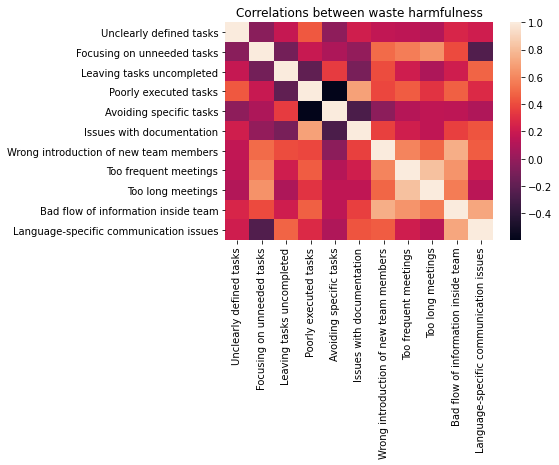

In [24]:
corr = df.iloc[:,list(chain(range(10, 15), range(21, 27)))].corr()
columns = [col[col.index('[')+1:-1] for col in corr.columns]
sns.heatmap(corr, xticklabels=columns, yticklabels=columns).set_title("Correlations between waste harmfulness")
plt.show()